In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import f1_score, roc_auc_score, cohen_kappa_score, precision_score, recall_score, accuracy_score, confusion_matrix
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.models import Sequential
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
from keras.layers.normalization import BatchNormalization
from keras.models import Model, Sequential
from keras.applications.xception import Xception
from keras.applications import *
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from PIL import Image
import random
import os
import cv2
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier 
from keras.callbacks import EarlyStopping
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm
from sklearn.decomposition import PCA

In [ ]:
!pip install efficientnet

In [ ]:
import keras 
from keras import applications, metrics, layers, models, regularizers, optimizers
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.models import Model, Sequential
from keras.applications.inception_resnet_v2 import InceptionResNetV2, preprocess_input
from keras.applications import * 
from keras.callbacks import EarlyStopping
from tensorflow.keras.applications import EfficientNetB4

In [ ]:
'''try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection
    print("Running on TPU ", tpu.cluster_spec().as_dict()["worker"])
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
except ValueError:
    print("Not connected to a TPU runtime. Using CPU/GPU strategy")
    strategy = tf.distribute.MirroredStrategy()'''

'try:\n    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection\n    print("Running on TPU ", tpu.cluster_spec().as_dict()["worker"])\n    tf.config.experimental_connect_to_cluster(tpu)\n    tf.tpu.experimental.initialize_tpu_system(tpu)\n    strategy = tf.distribute.experimental.TPUStrategy(tpu)\nexcept ValueError:\n    print("Not connected to a TPU runtime. Using CPU/GPU strategy")\n    strategy = tf.distribute.MirroredStrategy()'

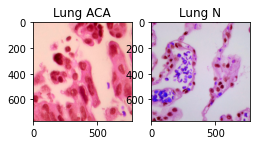

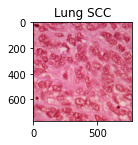

In [ ]:
lung_aca =  "/content/drive/MyDrive/lung_image_sets/lung_aca/"

plt.subplot(131)
img = cv2.imread(lung_aca + os.listdir(lung_aca)[0])
plt.title('Lung ACA')
plt.imshow(img)

plt.subplot(132)
lung_n = "/content/drive/MyDrive/lung_image_sets/lung_n/"
img = cv2.imread(lung_n + os.listdir(lung_n)[0])
plt.title('Lung N')
plt.imshow(img)
plt.show()

plt.subplot(133)
lung_scc = "/content/drive/MyDrive/lung_image_sets/lung_scc/"
img = cv2.imread(lung_scc + os.listdir(lung_scc)[0])
plt.title('Lung SCC')
plt.imshow(img)
plt.show()



In [ ]:
data_dir = "/content/drive/MyDrive/lung_image_sets/"
SIZE_X = SIZE_Y = 128

datagen = tf.keras.preprocessing.image.ImageDataGenerator(validation_split = 0.1)

train_it = datagen.flow_from_directory(data_dir,
                                       class_mode = "categorical",
                                       target_size = (SIZE_X,SIZE_Y),
                                       color_mode="rgb",
                                       batch_size = 4, 
                                       shuffle = True,
                                       subset='training',
                                       seed = 42)

validate_it = datagen.flow_from_directory(data_dir,
                                       class_mode = "categorical",
                                       target_size = (SIZE_X, SIZE_Y),
                                       color_mode="rgb",
                                       batch_size = 4, 
                                       shuffle = False,
                                       subset='validation',
                                       seed = 42)

Found 13500 images belonging to 3 classes.
Found 1500 images belonging to 3 classes.


In [ ]:

'''base_model = EfficientNetB4(include_top=False, input_shape=(SIZE_X, SIZE_Y, 3), weights='imagenet')

for layer in base_model.layers:
    layer.trainable = False
                   
model = Model(inputs=base_model.input, outputs=base_model.layers[-1].output)
model.summary() '''

"base_model = EfficientNetB4(include_top=False, input_shape=(SIZE_X, SIZE_Y, 3), weights='imagenet')\n\nfor layer in base_model.layers:\n    layer.trainable = False\n                   \nmodel = Model(inputs=base_model.input, outputs=base_model.layers[-1].output)\nmodel.summary() "

In [ ]:
# X_train, X_val, X_test, y_train, y_val, y_test = get_features(model, train_it, validate_it)

In [ ]:
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

img_augmentation = Sequential(
    [
        preprocessing.RandomRotation(factor=0.15),
        preprocessing.RandomTranslation(height_factor=0.1, width_factor=0.1),
        preprocessing.RandomFlip(),
        preprocessing.RandomContrast(factor=0.1),
    ],
    name="img_augmentation",
)

In [ ]:
from tensorflow.keras.applications import EfficientNetB3
IMG_SIZE = 300

inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
x = img_augmentation(inputs)
outputs = EfficientNetB3(include_top=True, weights=None, classes=3)(x)
model = tf.keras.Model(inputs, outputs)
model.compile( optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

model.summary()  


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 300, 300, 3)]     0         
_________________________________________________________________
img_augmentation (Sequential (None, 300, 300, 3)       0         
_________________________________________________________________
efficientnetb3 (Functional)  (None, 3)                 10788146  
Total params: 10,788,146
Trainable params: 10,700,843
Non-trainable params: 87,303
_________________________________________________________________


In [ ]:
epochs = 15  
hist = model.fit(train_it, epochs=epochs, validation_data=validate_it, verbose=1,)

Epoch 1/15
3375/3375 [==============================] - 4327s 1s/step - loss: 1.0598 - accuracy: 0.6761 - val_loss: 2.2702 - val_accuracy: 0.5967
Epoch 2/15
3375/3375 [==============================] - 289s 86ms/step - loss: 0.5136 - accuracy: 0.8071 - val_loss: 0.5776 - val_accuracy: 0.7467
Epoch 3/15
3375/3375 [==============================] - 285s 85ms/step - loss: 0.4176 - accuracy: 0.8430 - val_loss: 0.2905 - val_accuracy: 0.8693
Epoch 4/15
3375/3375 [==============================] - 284s 84ms/step - loss: 0.3597 - accuracy: 0.8687 - val_loss: 1.8075 - val_accuracy: 0.5827
Epoch 5/15
3375/3375 [==============================] - 282s 84ms/step - loss: 0.2963 - accuracy: 0.8913 - val_loss: 0.1737 - val_accuracy: 0.9253
Epoch 6/15
3375/3375 [==============================] - 283s 84ms/step - loss: 0.2397 - accuracy: 0.9144 - val_loss: 0.2781 - val_accuracy: 0.8800
Epoch 7/15
3375/3375 [==============================] - 284s 84ms/step - loss: 0.2098 - accuracy: 0.9254 - val_loss: 0.

In [ ]:
model.save('Lung_B3.h5')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [ ]:
import numpy as np
np.savetxt("results_B3_lung.csv", y_pred, delimiter=",")

In [ ]:
np.savetxt("Actual_lung.csv", y_true, delimiter=",")